# **Nonlinear Support Vector Machine classifier**


# **Iris classification problem**

**Import basic libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Import the libraries for performing classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
#Define the column names
col_name=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]

#Read the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= col_name)

In the linear SVM colab, we noticed that Iris versicolor and Iris virginica are nonlinear. Let us try to fit nonlinear SVM and check how it classifies nonlinear data.

In [ ]:
data = df
# get names of indexes for which column 'class' has value 'Iris-setosa'
index_names = data[ data["class"] == 'Iris-setosa' ].index
  
# drop these row indexes
# from dataFrame
data.drop(index_names, inplace = True)
  
data

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


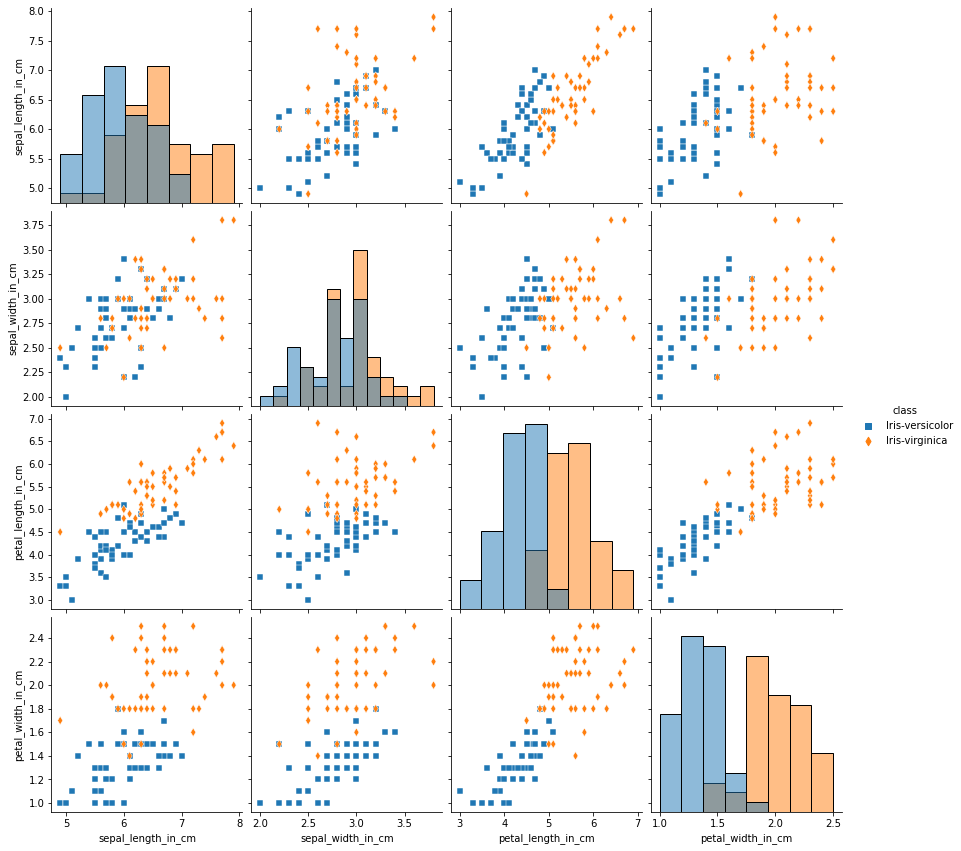

In [ ]:
sns.pairplot(df,height = 3, hue="class", diag_kind="hist", markers=["s", "d"]) # hue is the variable in "data" to map plot aspects to different colors.

# **Binary Nonlinear SVM classification**

In [ ]:
# Separatre the input and output feature values
X = data.iloc[:,:-1]

enc = OrdinalEncoder()
y=data['class']
y = np.array(y)

y_transformed = enc.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.25, random_state = 0)

print('Shape of training data',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (75, 4)
Shape of training labels (75, 1)
Shape of testing data (25, 4)
Shape of testing labels (25, 1)


## **Using Pipeline**

In [ ]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),
                         ("classifier", SVC(kernel = 'rbf', C = 1))])
pipe_1.fit(X_train,y_train.ravel())

# Evaluate the model using crossvalidation
acc = cross_val_score(pipe_1, X_train, y_train.ravel(),cv=10)
print("Training Accuracy: {:.2f} %".format(acc.mean()*100))

Training Accuracy: 94.64 %


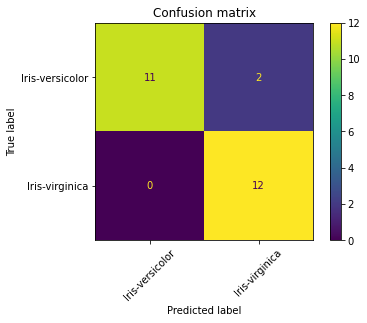

In [ ]:
# visualizing the confusion matrix
y_pred = pipe_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names=["Iris-versicolor","Iris-virginica"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.show()

In [ ]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        13
         1.0       0.86      1.00      0.92        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



area under curve (AUC):  0.9230769230769231


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


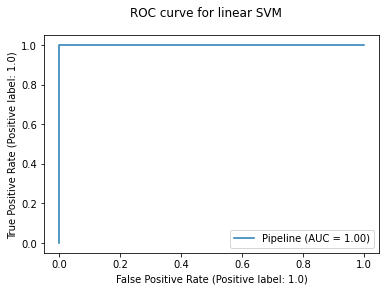

In [ ]:
from sklearn import metrics

roc_svm = plot_roc_curve(pipe_1, X_test, y_test)
roc_svm.figure_.suptitle("ROC curve for linear SVM")
print("area under curve (AUC): ", metrics.roc_auc_score(y_test, y_pred))
#Gives

## **Using GridsearchCV**

We can use a grid search cross-validation to explore combinations of parameters. Here we will adjust ``C`` (which controls the margin hardness) and ``gamma`` (which controls the size of the radial basis function kernel), and determine the best model:

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel = 'rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train.ravel())

print("The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.01} with a score of 1.00


## **Accuracy versus the Hyper Parameter C**

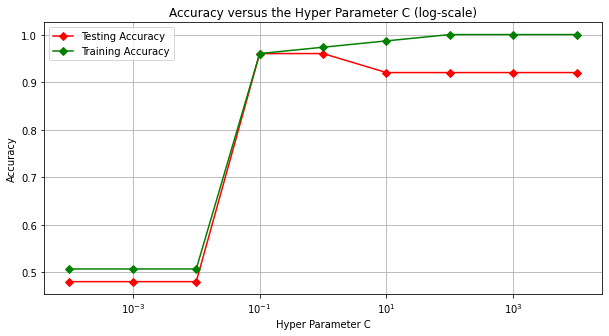

In [ ]:
acc = []
acc_tr = []
coefficient = []
C = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for c in C:
    svm = SVC(kernel = 'rbf', C=c)
    svm.fit(X_train, y_train.ravel())
   
    p_tr = svm.predict(X_train)
    a_tr = metrics.accuracy_score(y_train.ravel(), p_tr)
    
    pred = svm.predict(X_test)
    a = metrics.accuracy_score(y_test.ravel(), pred)
    
    acc_tr.append(a_tr)
    acc.append(a)

plt.subplots(figsize=(10, 5))
plt.semilogx(C, acc,'-gD' ,color='red' , label="Testing Accuracy")
plt.semilogx(C, acc_tr,'-gD' , label="Training Accuracy")
plt.grid(True)
plt.xlabel("Hyper Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus the Hyper Parameter C (log-scale)')
plt.show()

# **Visualizing the decision boundary**

In [ ]:
X=np.array(X_train)
y=np.array(y_train)
y=y.ravel()
# Let us consider sepal length and sepal width
X=X[:,(0,1)]
X.shape

(75, 2)

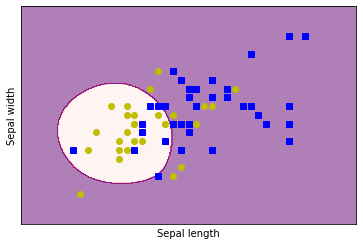

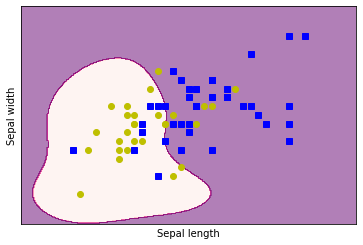

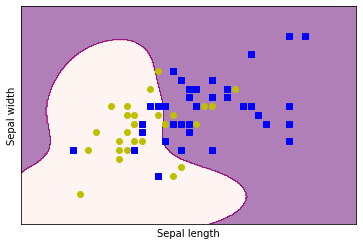

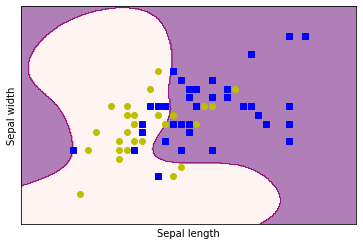

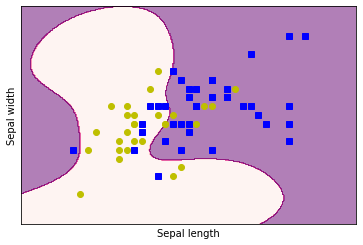

In [ ]:
h = .02  # step size in the mesh
C = [1e-1, 0.5, 1, 5, 10]  # SVM regularization parameter

for c in C:
  svc = SVC(kernel="rbf", gamma=0.7, C=c).fit(X, y)
  
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

  # Plot the decision boundary. 
  # For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdPu, alpha=0.5)

  # Plot also the training points
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-versicolor")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-virginica")

  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  #plt.title('SVC with RBF kernel C = '+ str(c))
  plt.show()

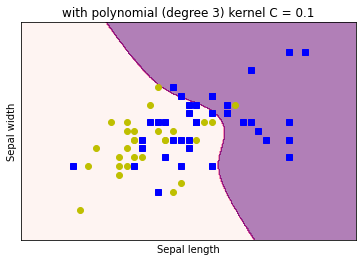

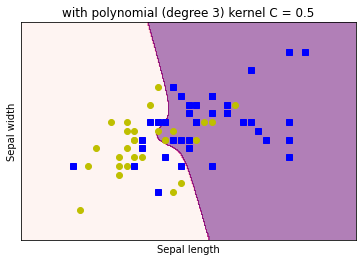

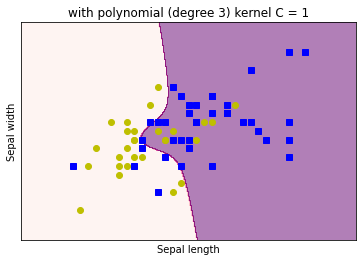

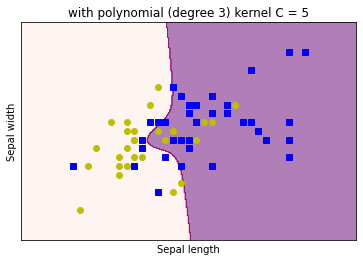

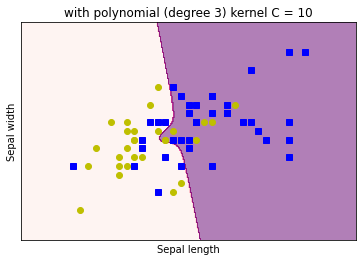

In [ ]:
h = .02  # step size in the mesh
C = [1e-1, 0.5, 1, 5, 10]  # SVM regularization parameter

for c in C:
  svc = SVC(kernel="poly", degree=3, gamma="auto", C=c).fit(X, y)
  
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

  # Plot the decision boundary. 
  # For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdPu, alpha=0.5)

  # Plot also the training points
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-versicolor")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-virginica")

  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title('with polynomial (degree 3) kernel C = '+ str(c))
  plt.show()

# Multiclass classification

Let us use the two Sepal features i.e., sepal width and length for performning multiclass classification.

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the two Sepal features.
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Create the training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Create a pipeline

pipe_2 = Pipeline([('scaler', MinMaxScaler()),
                         ("classifier", SVC(kernel='rbf', decision_function_shape='ovr', C=1, class_weight=None))])

# Fit the estimator , pipeline

pipe_2.fit(X_train,y_train)

# Get the predictions

y_pred = pipe_2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n', cm)

Confusion matrix : 
 [[15  0  0]
 [ 0  7  4]
 [ 0  3  9]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precisionScore = precision_score(y_test, y_pred, average='micro')
recallSscore = recall_score(y_test, y_pred, average='micro')
f1Score = f1_score(y_test, y_pred, average='micro')

print("Precision: {:.2f} %".format(precisionScore))
print("Recall: {:.2f} %".format(recallSscore))
print("f1_Score: {:.2f} %".format(f1Score))

Precision: 0.82 %
Recall: 0.82 %
f1_Score: 0.82 %


We can also get these metrics using classification_report.

In [ ]:
class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"]

print(classification_report(y_test, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.70      0.64      0.67        11
 Iris-virginica       0.69      0.75      0.72        12

       accuracy                           0.82        38
      macro avg       0.80      0.80      0.80        38
   weighted avg       0.82      0.82      0.82        38



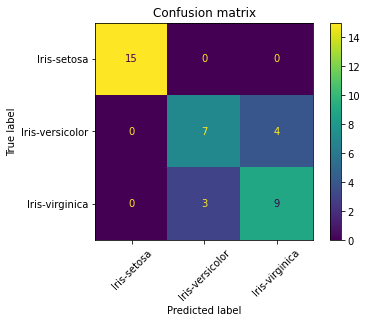

In [ ]:
# Display the confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.show()

In [ ]:
# Evaluate the model using crossvalidation
acc = cross_val_score(pipe_2, X_train, y_train,cv=10)
print(acc)
print("Accuracy: {:.2f} %".format(acc.mean()*100))

[0.58333333 0.91666667 0.72727273 0.81818182 0.72727273 0.81818182
 0.81818182 0.72727273 0.81818182 0.54545455]
Accuracy: 75.00 %


#### Visualizing the decision boundary

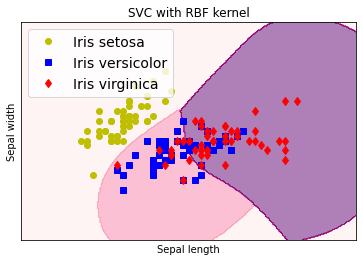

In [ ]:
h = .02  # step size in the mesh
C = 0.5  # SVM regularization parameter
svc = SVC(kernel="rbf", gamma=0.7, C=c).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. 
# For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdPu, alpha=0.5)

# Plot also the training points
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", label="Iris virginica")


plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc="upper left", fontsize=14)
plt.title('SVC with RBF kernel')
plt.show()

From the above figure, you can observe that the classes versicolor and virginica are overlapping and a linear SVM couldn't separate the classes using sepal features. 

#### Testing different C parameter

In [ ]:
def plotSVC(title):
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  # Plot also the training points
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", label="Iris virginica")
  #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.legend(loc="upper left", fontsize=14)
  plt.xlim(xx.min(), xx.max())
  plt.title(title)
  plt.show()

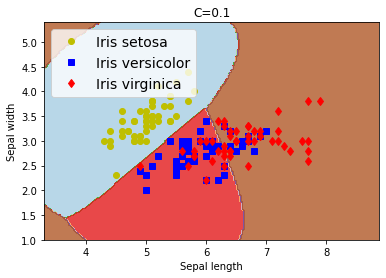

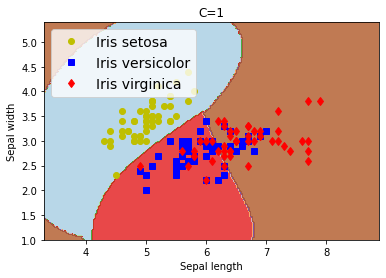

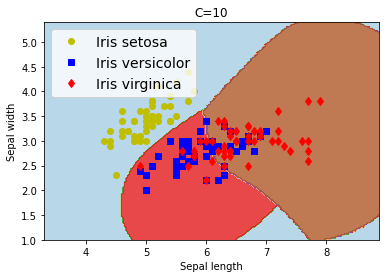

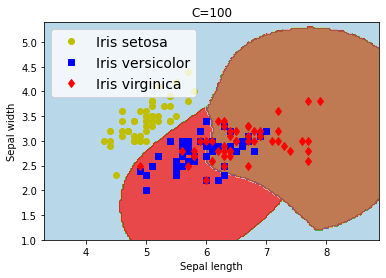

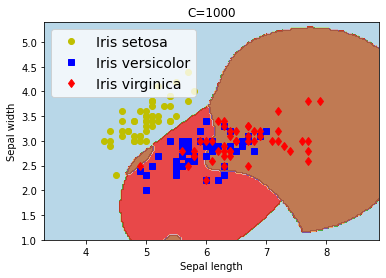

In [ ]:
c_values = [0.1, 1, 10, 100, 1000]
for c in c_values:
   svc = SVC(kernel="rbf", gamma=0.7, C=c).fit(X, y)
   plotSVC('C=' + str(c))